In [1]:
!wget --no-check-certificate \
    "https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip" \
    -O "/content/sample_data/FingerPrint.zip"

--2023-05-27 22:47:44--  https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main [following]
--2023-05-27 22:47:44--  https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/sample_data/FingerPrint.zip’

/content/sample_dat     [  <=>               ]   4.19M  13.4MB/s    in 0.3s    

2023-05-27 22:47:45 (13.4 MB/s) - ‘/content/sample_data/FingerPrint.zip’ saved [4394944]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sample_data/FingerPrint.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/sample_data/') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
mkdir '/content/sample_data/LowResolution'

In [4]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/sample_data/FingerPrintData-main/DB1_B'
output_dir = '/content/sample_data/LowResolution'



scale_factor = 0.2

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    input_image = Image.open(os.path.join(input_dir, filename))
    new_size = (int(input_image.size[0] * scale_factor), int(input_image.size[1] * scale_factor))
    output_image = input_image.resize(new_size, resample=Image.LANCZOS)   
    # Save the output image to the output directory
    output_image.save(os.path.join(output_dir, filename))

In [5]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.12.0


In [6]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/sample_data/FingerPrintData-main/DB1_B'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):       
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 290.82it/s]


In [7]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 1210.17it/s]


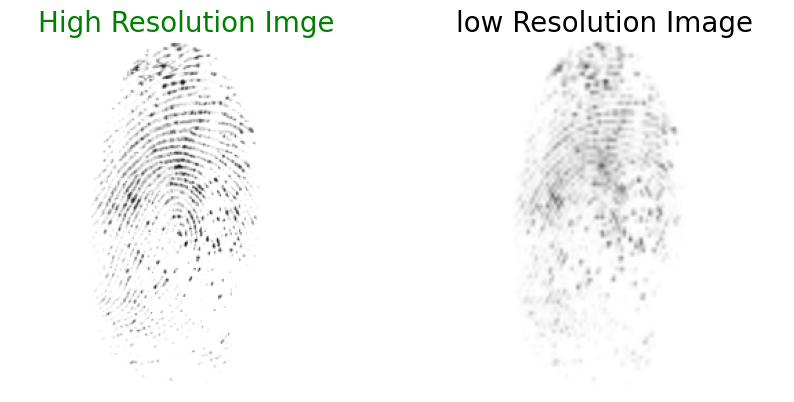

In [8]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [9]:
train_high_image = high_img[:55]
train_low_image = low_img[:55]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[55:60]
validation_low_image = low_img[55:60]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[60:]
test_low_image = low_img[60:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (55, 256, 256, 3)
Shape of test images: (6, 256, 256, 3)
Shape of validation images: (5, 256, 256, 3)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


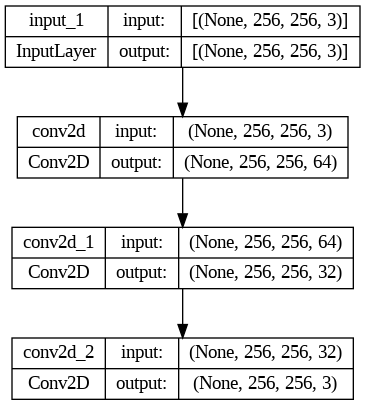

In [10]:
from keras import layers

input_img=Input(shape=(256,256,3))
l1=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input_img)
l2=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (l1)
l3=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (l2)


SRCNN=Model(input_img,l3)


def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
SRCNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=pixel_mse_loss)
SRCNN.summary()
plot_model(SRCNN, to_file ='super_res.png',show_shapes=True)

In [11]:
SRCNN.fit(train_low_image, train_high_image, epochs = 20, batch_size = 1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/20
55/55 [==============================] - 11s 15ms/step - loss: 0.0918 - val_loss: 0.0146
Epoch 2/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0134 - val_loss: 0.0098
Epoch 3/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.0082
Epoch 5/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.0076
Epoch 6/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0064
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 11/20
55/55

In [12]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

1/1 [==============================] - 0s 159ms/step


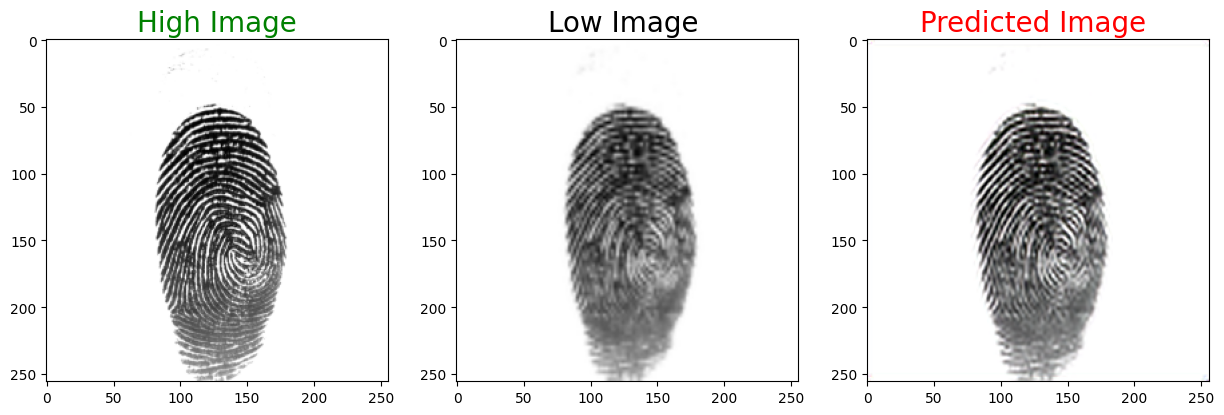

PSNR 22.740963 dB
1/1 [==============================] - 0s 18ms/step


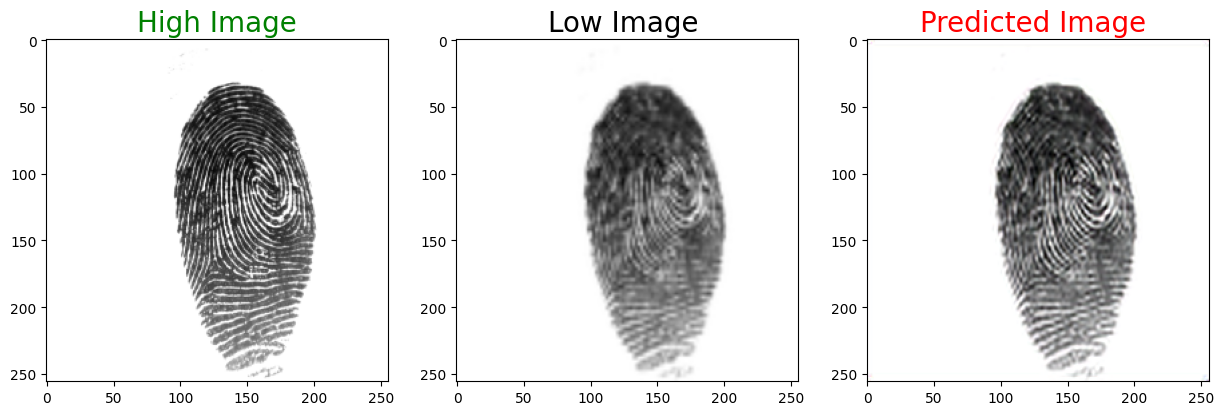

PSNR 22.799635 dB
1/1 [==============================] - 0s 29ms/step


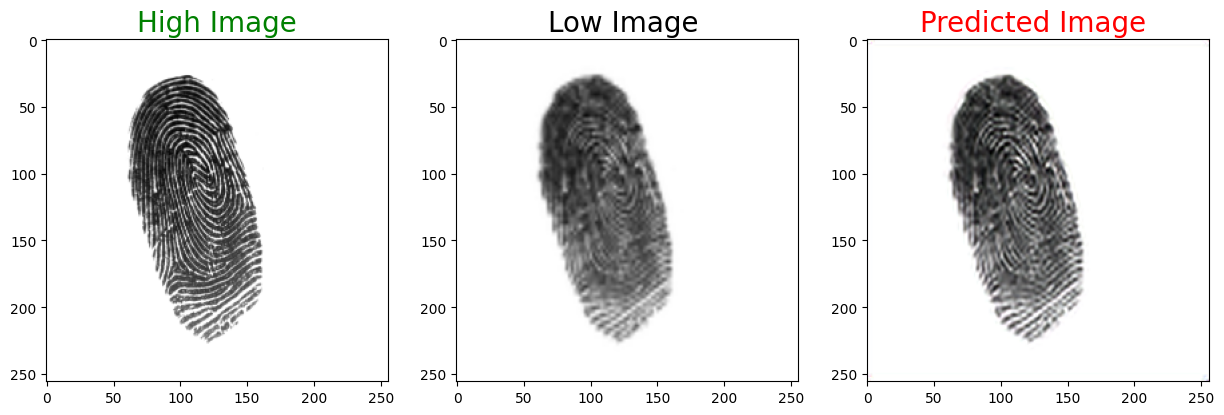

PSNR 22.967896 dB
1/1 [==============================] - 0s 18ms/step


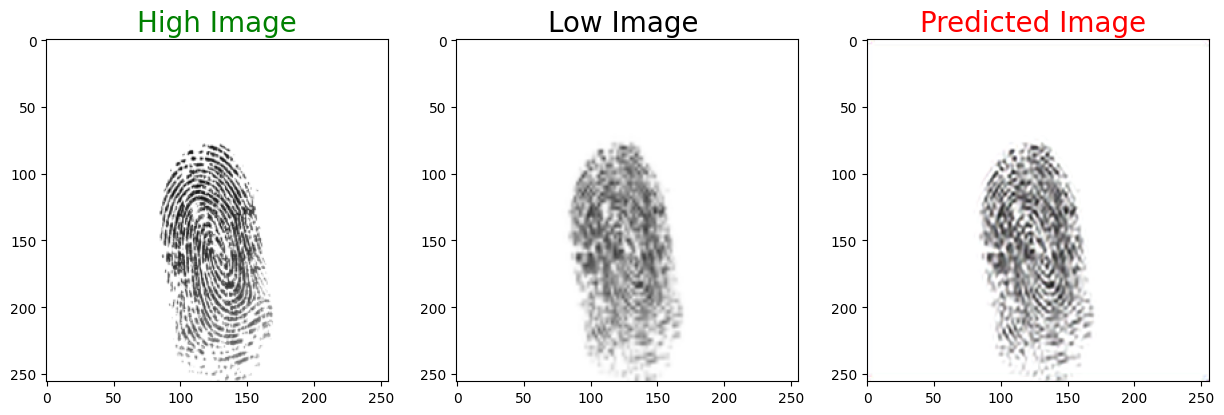

PSNR 22.757338 dB
1/1 [==============================] - 0s 46ms/step


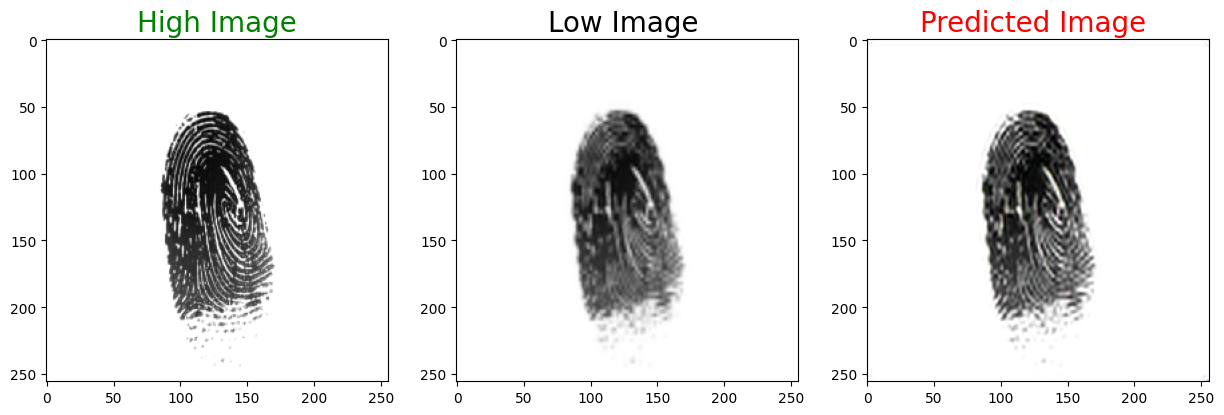

PSNR 24.511175 dB
1/1 [==============================] - 0s 26ms/step


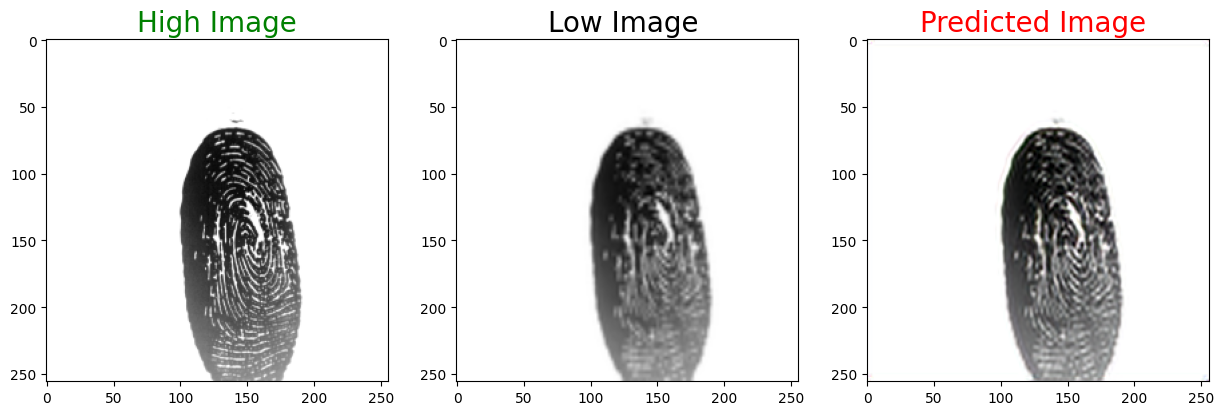

PSNR 25.413229 dB


In [13]:
from termcolor import colored
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

font_size = 50
for i in range(0,6):
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    
    #print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))
    print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB')
    

In [14]:
for i in range(0,6):
    predicted = np.clip(SRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    #plot_images(test_high_image[i],test_low_image[i],predicted)
    
    #print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))
    print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB')

1/1 [==============================] - 0s 28ms/step
PSNR 22.740963 dB
1/1 [==============================] - 0s 26ms/step
PSNR 22.799635 dB
1/1 [==============================] - 0s 27ms/step
PSNR 22.967896 dB
1/1 [==============================] - 0s 28ms/step
PSNR 22.757338 dB
1/1 [==============================] - 0s 20ms/step
PSNR 24.511175 dB
1/1 [==============================] - 0s 19ms/step
PSNR 25.413229 dB


In [21]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, Activation

def build_model():
    model = Sequential()
    model.add(Conv2D(filters=56, kernel_size=5, padding='same', input_shape=(256, 256, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=56, kernel_size=5, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=3, kernel_size=9, padding='same'))
    #model.add(Conv2DTranspose(filters=1, kernel_size=9, strides=1, padding='same'))
    #model = Model(Input(shape=(256,256, 3)), model.output_shape)
    return model

In [ ]:
def fsrcnn_model():
    inputs = tf.keras.Input(shape=(None, None, 3))
    
    # Feature extraction
    x = layers.Conv2D(56, kernel_size=5, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(16, kernel_size=1, padding='same', activation='relu')(x)
    
    # Shrinking
    x = layers.Conv2D(12, kernel_size=1, padding='same', activation='relu')(x)
    
    # Non-linear mapping
    for _ in range(4):
        x = layers.Conv2D(12, kernel_size=3, padding='same', activation='relu')(x)
        
    # Expanding
    x = layers.Conv2D(56, kernel_size=1, padding='same', activation='relu')(x)
    
    # Deconvolution
    x = layers.Conv2DTranspose(3, kernel_size=9, strides=2, padding='same')(x)
    output = tf.nn.tanh(x)  # Output range: [-1, 1]
    input1 = tf.keras.Input(shape=(10,))
    model = tf.keras.Model(inputs=[input1, input2], outputs=output)
    return model









In [ ]:
# Create an instance of the FSRCNN model
model = fsrcnn_model()

# Print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 56)    4256      
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 16)    912       
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 12)    204       
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 12)    1308      
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 12)    1308      
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 12)    1308

In [65]:
#@title Default title text
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, Conv2DTranspose
import tensorflow as tf




def fsrcnn_model():
    model = Sequential()
    print("done1")
    #feature extraction
    model.add(Conv2D(filters=56, kernel_size=5, padding='same', input_shape=(None, None, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done2")
    #shrinking
    model.add(Conv2D(filters=12, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done3")
    #nonlinear mapping
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    print("done4")
    #expanding
    model.add(Conv2D(filters=56, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done5")
    #Decpnvolution
    model.add(Conv2DTranspose(filters=1, kernel_size=9, strides=1, padding='same'))
    print("done6")
    #inputs = tf.keras.layers.Input( shape=( 256,256,3, ) )
    #input1 = tf.keras.Input(shape=(None,None,3,))
    #output=model(input1)
    #model = tf.keras.Model(inputs=input1, outputs=output)
    print("done7")
    return model

In [66]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

def train_model():
    #model = build_model()
    model = fsrcnn_model()
    print("done8")
    optimizer = Adam(lr=0.0001)
    print("done9")
    model.compile(optimizer=optimizer, loss=MeanSquaredError())
    print("done10")
    # Load and preprocess training data
    x_train, y_train =  train_low_image, train_high_image
    print(x_train.shape)
    print(y_train.shape)

    model.fit(x_train, y_train, epochs=100, batch_size=1)
    return model

In [67]:
FSRCNN= train_model()

done1
done2
done3
done4
done5
done6
done7
done8
done9
done10
(55, 256, 256, 3)
(55, 256, 256, 3)
Epoch 1/100
55/55 [==============================] - 4s 11ms/step - loss: 0.0795
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 7/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 8/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 9/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 10/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 11/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 12/100
55/55 [

In [65]:
x_train, y_train =  train_low_image, train_high_image
x_train.shape
y_train.shape

(55, 256, 256, 3)

In [68]:
FSRCNN.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, None, None, 56)    4256      
                                                                 
 activation_101 (Activation)  (None, None, None, 56)   0         
                                                                 
 conv2d_106 (Conv2D)         (None, None, None, 16)    912       
                                                                 
 activation_102 (Activation)  (None, None, None, 16)   0         
                                                                 
 conv2d_107 (Conv2D)         (None, None, None, 12)    204       
                                                                 
 activation_103 (Activation)  (None, None, None, 12)   0         
                                                                 
 conv2d_108 (Conv2D)         (None, None, None, 12)  

In [78]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted,cmap='gray')
   
    plt.show()

'''for i in range(0,6):
    predicted = np.clip(FSRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    print(predicted.shape)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR',PSNR(test_high_image[i],predicted),'dB', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))'''

'for i in range(0,6):\n    predicted = np.clip(FSRCNN.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)\n    print(predicted.shape)\n    plot_images(test_high_image[i],test_low_image[i],predicted)\n    print(\'PSNR\',PSNR(test_high_image[i],predicted),\'dB\', "SSIM",tf.image.ssim(test_high_image[i],predicted,max_val=1))'

1/1 [==============================] - 0s 22ms/step
(1, 256, 256, 1)
(256, 256, 1)


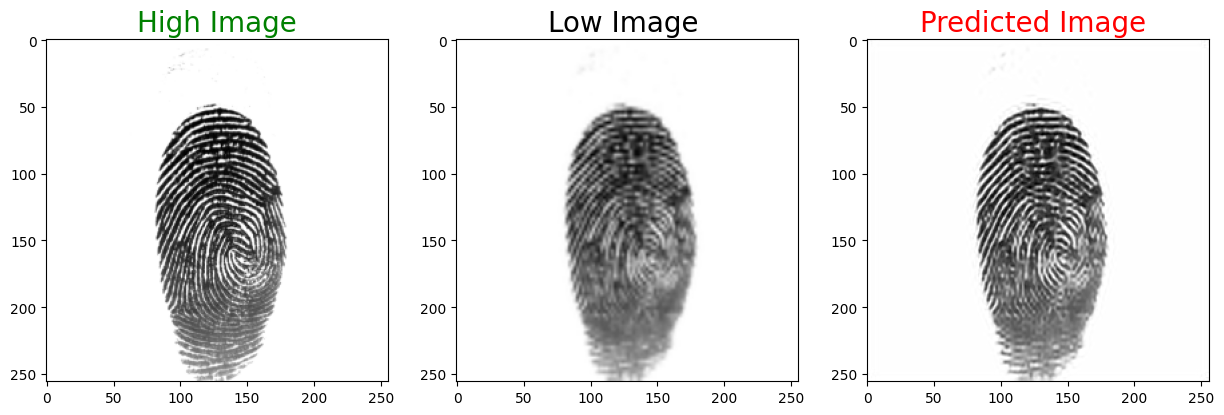

PSNR tf.Tensor(23.674416, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 32ms/step
(1, 256, 256, 1)
(256, 256, 1)


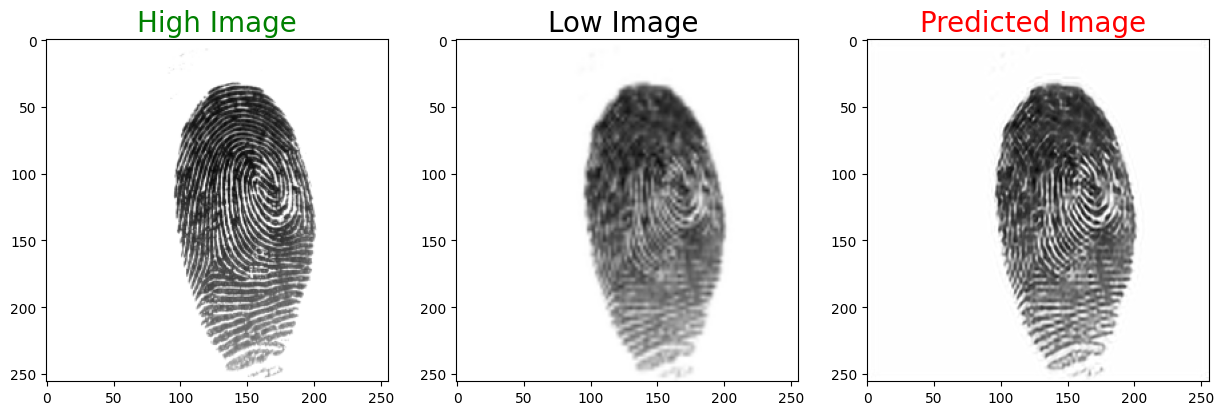

PSNR tf.Tensor(23.308058, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 21ms/step
(1, 256, 256, 1)
(256, 256, 1)


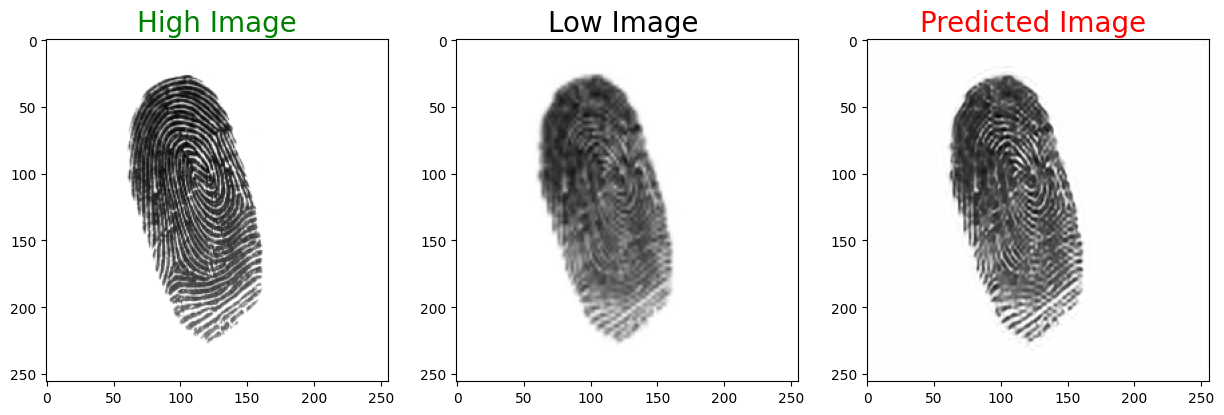

PSNR tf.Tensor(23.40973, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 27ms/step
(1, 256, 256, 1)
(256, 256, 1)


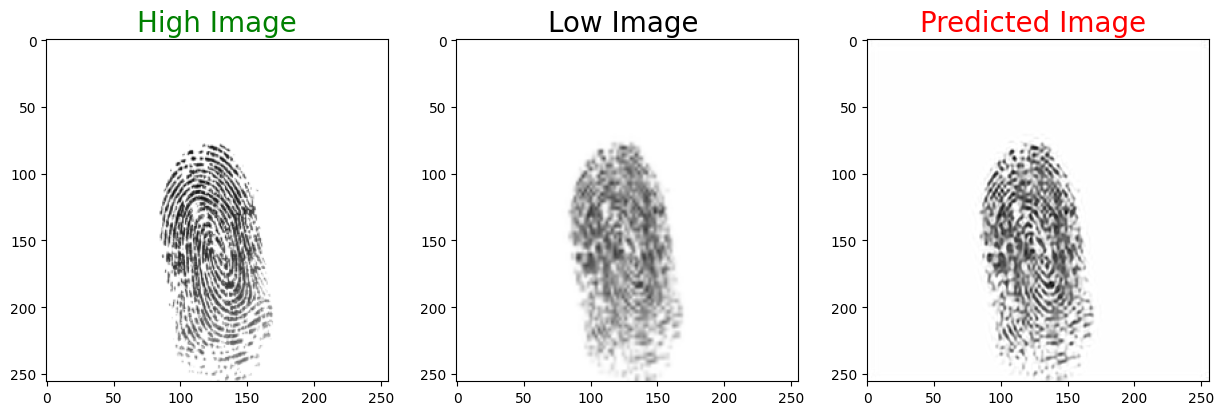

PSNR tf.Tensor(23.119993, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 20ms/step
(1, 256, 256, 1)
(256, 256, 1)


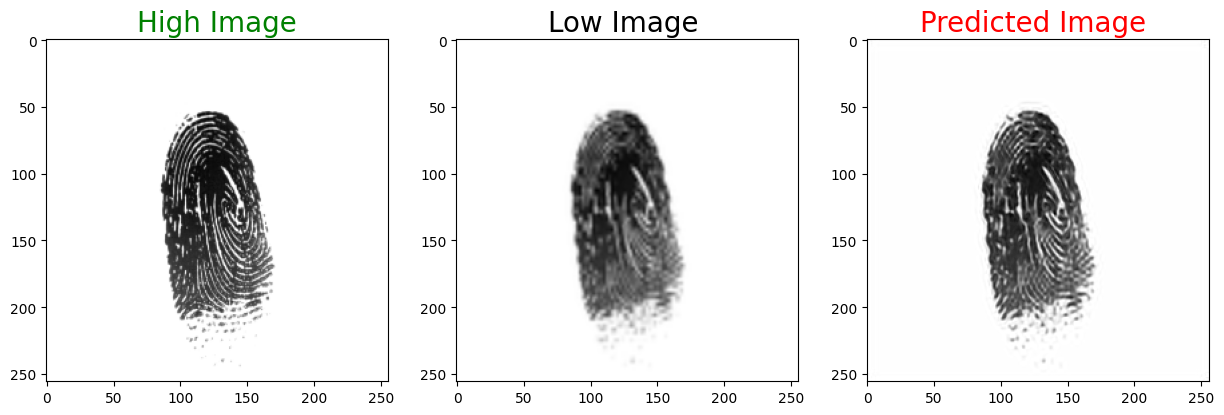

PSNR tf.Tensor(25.194275, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 21ms/step
(1, 256, 256, 1)
(256, 256, 1)


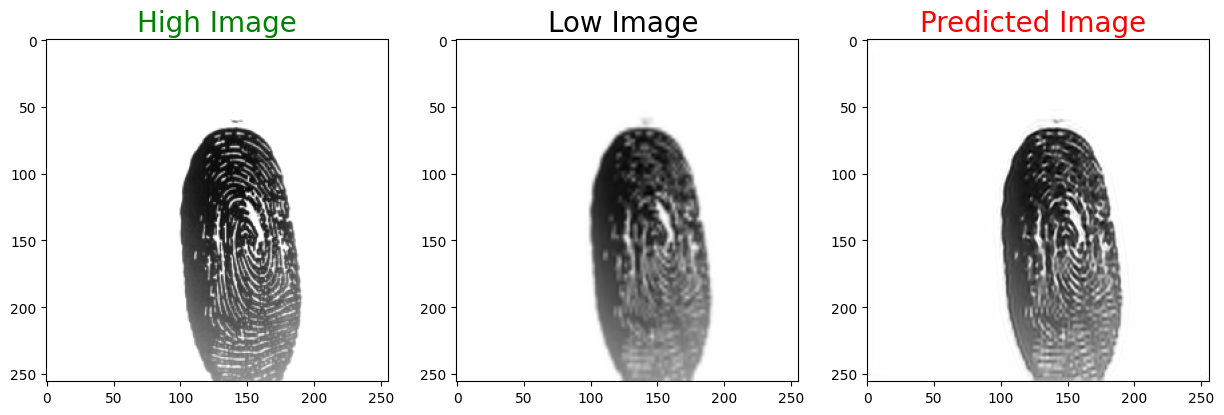

PSNR tf.Tensor(25.948013, shape=(), dtype=float32) dB


In [79]:
for i in range(6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    print(predicted.shape)
    predicted = np.reshape(predicted, (256, 256, 1))
    #predicted = np.squeeze(predicted, axis=0)
    print(predicted.shape)
    plot_images(test_high_image[i], test_low_image[i], predicted)
    print('PSNR', PSNR(test_high_image[i], predicted), 'dB')
    #print('SSIM', tf.image.ssim(tf.convert_to_tensor(test_high_image[i]), tf.convert_to_tensor(predicted), max_val=1))

In [80]:
for i in range(0,6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    predicted = np.reshape(predicted, (256, 256, 1))
    print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB')

1/1 [==============================] - 0s 20ms/step
PSNR 23.674416 dB
1/1 [==============================] - 0s 21ms/step
PSNR 23.308058 dB
1/1 [==============================] - 0s 22ms/step
PSNR 23.40973 dB
1/1 [==============================] - 0s 24ms/step
PSNR 23.119993 dB
1/1 [==============================] - 0s 25ms/step
PSNR 25.194275 dB
1/1 [==============================] - 0s 23ms/step
PSNR 25.948013 dB
